In [1]:
import pandas as pd
%matplotlib inline

In [3]:
actions_train = pd.read_csv('train.csv', sep='\t')
#actions_test = pd.read_csv('test.csv', sep='\t')
profiles = pd.read_csv('profiles.csv', sep='\t')

In [4]:
# Let's look at the structure of the table
actions_train.head()

,user_id,action,timestamp
0,101073,3,1
1,94416,3,2
2,71691,3,3
3,27237,4,4
4,77225,3,5


In [5]:
actions_train.describe()

,user_id,action,timestamp
count,561500.000000,561500.000000,561500.000000
mean,57856.363583,3.464545,280750.500000
std,33293.740331,0.783830,162091.232412
min,1.000000,1.000000,1.000000
25%,28905.000000,3.000000,140375.750000
50%,58170.000000,3.000000,280750.500000
75%,86532.000000,4.000000,421125.250000
max,115101.000000,5.000000,561500.000000


In [6]:
print(actions_train.shape)
print(actions_train.drop_duplicates().shape)

(561500, 3)
(561500, 3)


In [13]:
# We have no duplicates in the data and no empty values

# Next we check if the timestamps are in order
all(actions_train['timestamp'] == actions_train['timestamp'].sort_values())

True

In [14]:
# Let's check the number of different user_id in the training
actions_train.groupby('user_id').count().shape

(96682, 2)

In [15]:
print(profiles.shape)
print(profiles.drop_duplicates().shape)

(115101, 3)
(115101, 3)


In [388]:
# Let's check how job_seeking_status is distributed
profiles.groupby('job_seeking_status').count()

,user_id,number_contacts
job_seeking_status,,
1,26710,26710
2,42350,42350
3,46041,46041


In [91]:
profiles.groupby('job_seeking_status').mean()
# People with job seeking status = 1 tend to have a slightly lower number of contacts, but these might not be very significative

,user_id,number_contacts
job_seeking_status,,
1,57312.662935,122.931898
2,57622.077969,178.436340
3,57623.887883,208.871158


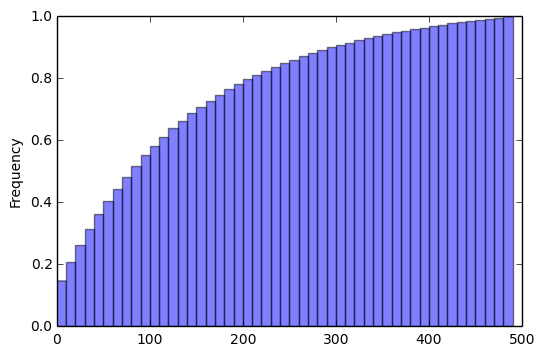

In [389]:
# And then the distribution of the number of contacts.
bins = range(0,500,10) #+ [profiles['number_contacts'].max()]
profiles['number_contacts'].plot.hist(alpha=0.5, bins = bins,cumulative=True, normed=True)

In [ ]:
# About 50 % of the profiles have less then 100 contacts

In [67]:
profiles['number_contacts'].max()

35654

In [ ]:
# Let's focus again on the actions

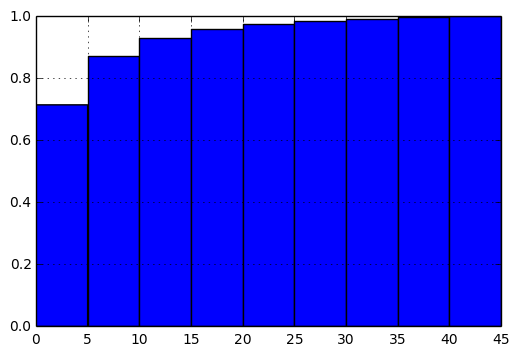

In [391]:
# Let's check the distribution of th enumber of actions we have for users.
actions_train.groupby('user_id').count()['action'].hist(bins=range(0,50,5),normed=True,cumulative=True)
# Around 70% of the users in the training have less than 5 actions

In [24]:
# Let's check the distribution of actions
actions_train.groupby('action').count()/actions_train.shape[0]

,user_id,timestamp
action,,
1,0.004901,0.004901
2,0.017877,0.017877
3,0.635240,0.635240
4,0.191740,0.191740
5,0.150242,0.150242


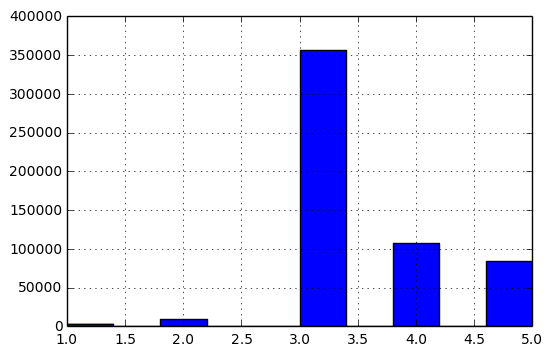

In [22]:
actions_train['action'].hist()

In [ ]:
# 3 is the most common action (63%) followed by 4 (19%), 5 (15%), 2 (~2%) and 1 (<1%)

In [63]:
# Let's see if the distribution changes significantly according to the profile type

In [46]:
act_mode = actions_train.groupby(['user_id'])['action'].agg(lambda x:x.value_counts().index[0])

In [57]:
act_mode_prof = pd.merge(act_mode.to_frame(),profiles, left_index=True, right_on='user_id')

In [90]:
act_mode_prof.groupby(['job_seeking_status','action']).count()#/act_mode_prof.groupby('job_seeking_status').count()

user_id  number_contacts
job_seeking_status action                          
1                  1           213              213
                   2          1060             1060
                   3         14491            14491
                   4          2719             2719
                   5          2889             2889
2                  1           272              272
                   2          1095             1095
                   3         22216            22216
                   4          6963             6963
                   5          4806             4806
3                  1           284              284
                   2           896              896
                   3         20003            20003
                   4         13383            13383
                   5          5392             5392

In [ ]:
# The distribution changes slightly for status 3 (job seeking status) 
# with a bit less interactions with other user and more job browsing

In [89]:
act_mode_prof.groupby(['job_seeking_status','action'])['number_contacts'].median()

job_seeking_status  action
1                   1          33.0
                    2          47.0
                    3          82.0
                    4          68.0
                    5          38.0
2                   1          31.5
                    2         104.0
                    3         119.0
                    4         108.0
                    5          62.0
3                   1          31.5
                    2         136.0
                    3         120.0
                    4         117.0
                    5          75.0
Name: number_contacts, dtype: float64

In [ ]:
# We confirm that people with job_seeking_status tend to have less contacts but we also see a trend 
# where the most common action by a use with low number of contacts are 1 and 5 regardless of job status

In [94]:
# Now we start to take a look at the transitions
grouped = actions_train.groupby('user_id')
actions_train['previous_action'] = grouped['action'].shift(+1)
actions_train['previous_timestamp'] = grouped['timestamp'].shift(+1)
actions_train['timediff'] = actions_train['timestamp'] - actions_train['previous_timestamp'] 

In [98]:
# Let's look at the actions for a particular user when previous_action is NaN when it's the first action
actions_train[actions_train['user_id']==49778] 

,user_id,action,timestamp,previous_action,previous_timestamp,timediff
14,49778,4,15,NaN,NaN,NaN
2796,49778,3,2797,4.0,15.0,2782.0
2802,49778,3,2803,3.0,2797.0,6.0
2811,49778,4,2812,3.0,2803.0,9.0
34910,49778,4,34911,4.0,2812.0,32099.0
52767,49778,4,52768,4.0,34911.0,17857.0
52768,49778,4,52769,4.0,52768.0,1.0
98474,49778,4,98475,4.0,52769.0,45706.0
123977,49778,4,123978,4.0,98475.0,25503.0
124000,49778,4,124001,4.0,123978.0,23.0


In [102]:
# Let's look at the most common transitions
actions_train.fillna(-1).groupby(['previous_action','action'])['user_id'].count()

previous_action  action
-1.0             1            818
                 2           3102
                 3          56602
                 4          24013
                 5          12147
 1.0             1           1098
                 2             31
                 3            190
                 4            281
                 5            200
 2.0             1             34
                 2           4465
                 3            757
                 4            848
                 5            228
 3.0             1            248
                 2           1316
                 3         289883
                 4           6144
                 5           5473
 4.0             1            311
                 2            839
                 3           4703
                 4          73088
                 5           2939
 5.0             1            243
                 2            285
                 3           4552
                 4      

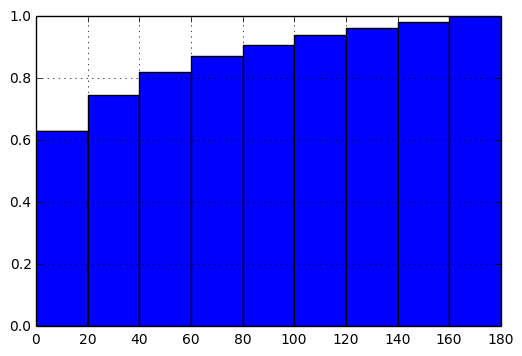

In [106]:
# Repeating the previous action is the most common event, Let's see if that is true for events separated
# by a small time difference or by a big one

actions_train['timediff'].hist(bins=range(0,200,20),cumulative=True,normed=True)

In [107]:
# Let's pick 60 as a cutoff
actions_train[actions_train['timediff'] < 60].fillna(-1).groupby(['previous_action','action'])['user_id'].count()

previous_action  action
1.0              1            425
                 2              7
                 3             27
                 4             23
                 5             46
2.0              1              4
                 2           3427
                 3            137
                 4             49
                 5             23
3.0              1             28
                 2            678
                 3         212325
                 4            431
                 5           1647
4.0              1             17
                 2             52
                 3            414
                 4          32659
                 5            558
5.0              1             65
                 2             33
                 3           1652
                 4            568
                 5          27462
Name: user_id, dtype: int64

In [119]:
actions_train[actions_train['timediff'] > 1500].fillna(-1).groupby(['previous_action','action'])['user_id'].count()

previous_action  action
1.0              1            62
                 2            11
                 3           105
                 4           173
                 5            68
2.0              1            19
                 2           431
                 3           522
                 4           568
                 5           125
3.0              1           157
                 2           544
                 3         31861
                 4          4864
                 5          2330
4.0              1           177
                 2           539
                 3          3390
                 4         18801
                 5          1366
5.0              1            90
                 2           161
                 3          1393
                 4          1615
                 5          1553
Name: user_id, dtype: int64

In [ ]:
# looks like if a long time has passed since the previous action the behaviour changes a bit and
# for previous actions like 1,2 and 5 action repeating becomes less common than switching action
# with 4 being the most common occurrence. Actions 3 and 4 are still very strong predictors. 
# 1500 seems like a good treshold

In [123]:
# Let's see if the profile can discriminate here 
jj = actions_train.join(profiles,on='user_id',rsuffix='_p')
jj[jj['timediff'] > 1500].fillna(-1).groupby(['previous_action','action','job_seeking_status'])['user_id'].count()

previous_action  action  job_seeking_status
1.0              1        1.0                    17
                          2.0                    29
                          3.0                    16
                 2        1.0                     3
                          2.0                     5
                          3.0                     3
                 3        1.0                    20
                          2.0                    35
                          3.0                    50
                 4        1.0                    41
                          2.0                    71
                          3.0                    61
                 5        1.0                     9
                          2.0                    31
                          3.0                    28
2.0              1        1.0                     1
                          2.0                     9
                          3.0                     9
                 2  

In [126]:
# doesn't seems so, let's see with the median of the number of contacts
jj[jj['timediff'] > 1500].fillna(-1).groupby(['previous_action','action'])['number_contacts'].agg(['count','median'])

count  median
previous_action action               
1.0             1          62    73.5
                2          11    38.0
                3         105    35.0
                4         173    72.0
                5          68    54.5
2.0             1          19   148.0
                2         431    97.0
                3         522   144.0
                4         568   122.5
                5         125    88.0
3.0             1         157    66.0
                2         544   100.0
                3       31861    74.0
                4        4864    88.0
                5        2330    71.0
4.0             1         177    59.0
                2         539   123.0
                3        3390    78.0
                4       18801   106.0
                5        1366    86.0
5.0             1          90    53.0
                2         161   112.0
                3        1393    71.0
                4        1615    85.0
                5        1553    68.0

In [ ]:
# also the medians are pretty close..

In [127]:
# Now let's look at the first actions registerd for a user
first_actions = actions_train[pd.np.isnan(actions_train['previous_action'])]
first_actions.groupby('action').count()

,user_id,timestamp,previous_action,previous_timestamp,timediff
action,,,,,
1,818,818,0,0,0
2,3102,3102,0,0,0
3,56602,56602,0,0,0
4,24013,24013,0,0,0
5,12147,12147,0,0,0


In [144]:
# Let's see if the job seeking status changes the distribution here
jj = first_actions.join(profiles,on='user_id',rsuffix='_p')
jj.groupby(['job_seeking_status','action'])['number_contacts'].agg(['count','median'])
jj.groupby(['action'])['number_contacts'].agg(['count','median'])

,count,median
action,,
1,818,66.0
2,3102,118.5
3,56602,94.0
4,24012,102.0
5,12147,81.0


In [ ]:
# The medians between actions 3, 4 and 5 are pretty close, but in any case the number of people starting with 3 
# is bigger than all the other categories together. So as a first action in doubt we can always predict 3 regardless
# of the profile info

In [147]:
# Now let's focus on streaks, sequences of repetitions of the same actions and how they break.
actions_train['break_action'] = actions_train['previous_action'] != actions_train['action']
actions_train['repeated_action'] = actions_train['previous_action'] == actions_train['action']
actions_train['break_val'] = actions_train.groupby('user_id')['break_action'].cumsum()
actions_train['streak'] = actions_train.groupby(['user_id','break_val'])['repeated_action'].cumsum()+1

In [151]:
# These are the most common ways to break a streak
actions_train[actions_train['break_action']].groupby(['previous_action','action']).count()

user_id  timestamp  previous_timestamp  timediff  \
previous_action action                                                     
1.0             2            31         31                  31        31   
                3           190        190                 190       190   
                4           281        281                 281       281   
                5           200        200                 200       200   
2.0             1            34         34                  34        34   
                3           757        757                 757       757   
                4           848        848                 848       848   
                5           228        228                 228       228   
3.0             1           248        248                 248       248   
                2          1316       1316                1316      1316   
                4          6144       6144                6144      6144   
                5          5473       5473                5473      5473   
4.0             1           311        311                 311       311   
                2           839        839                 839       839   
                3          4703       4703                4703      4703   
                5          2939       2939                2939      2939   
5.0             1           243        243                 243       243   
                2           285        285                 285       285   
                3          4552       4552                4552      4552   
                4          3288       3288                3288      3288   

                        break_action  break_val  repeated_action  streak  
previous_action action                                                    
1.0             2                 31         31               31      31  
                3                190        190              190     190  
                4                281        281              281     281  
                5                200        200              200     200  
2.0             1                 34         34               34      34  
                3                757        757              757     757  
                4                848        848              848     848  
                5                228        228              228     228  
3.0             1                248        248              248     248  
                2               1316       1316             1316    1316  
                4               6144       6144             6144    6144  
                5               5473       5473             5473    5473  
4.0             1                311        311              311     311  
                2                839        839              839     839  
                3               4703       4703             4703    4703  
                5               2939       2939             2939    2939  
5.0             1                243        243              243     243  
                2                285        285              285     285  
                3               4552       4552             4552    4552  
                4               3288       3288             3288    3288

In [ ]:
# Confirms what we found previously with long time difference
# 1-> 4, 2-> 4, 5->3 but also 3->4 and 4->3

In [ ]:
# Maybe some users do a lot of changes and others do a lot of long streaks

In [171]:
streak_habits = actions_train[~pd.np.isnan(actions_train['previous_action'])].groupby('user_id')['break_action'].agg(['count','sum'])
streak_habits['change_ratio'] = streak_habits['sum']/streak_habits['count']

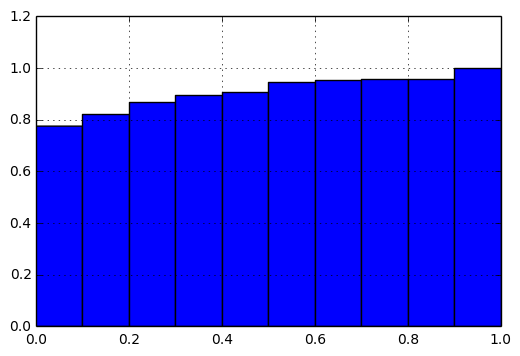

In [172]:
streak_habits['change_ratio'].hist(cumulative=True,normed=True)

In [175]:
jj= pd.merge(actions_train,streak_habits['change_ratio'].to_frame(), left_on='user_id',right_index=True)

In [186]:
jj[jj['change_ratio']> 0.5].groupby(['previous_action','action']).count()

user_id  timestamp  previous_timestamp  timediff  \
previous_action action                                                     
1.0             1            26         26                  26        26   
                2            19         19                  19        19   
                3            51         51                  51        51   
                4            85         85                  85        85   
                5            42         42                  42        42   
2.0             1            17         17                  17        17   
                2            53         53                  53        53   
                3           121        121                 121       121   
                4           307        307                 307       307   
                5            67         67                  67        67   
3.0             1            51         51                  51        51   
                2           170        170                 170       170   
                3           591        591                 591       591   
                4          1116       1116                1116      1116   
                5           762        762                 762       762   
4.0             1           108        108                 108       108   
                2           294        294                 294       294   
                3           905        905                 905       905   
                4           368        368                 368       368   
                5           645        645                 645       645   
5.0             1            55         55                  55        55   
                2            78         78                  78        78   
                3           667        667                 667       667   
                4           667        667                 667       667   
                5           578        578                 578       578   

                        break_action  break_val  repeated_action  streak  \
previous_action action                                                     
1.0             1                 26         26               26      26   
                2                 19         19               19      19   
                3                 51         51               51      51   
                4                 85         85               85      85   
                5                 42         42               42      42   
2.0             1                 17         17               17      17   
                2                 53         53               53      53   
                3                121        121              121     121   
                4                307        307              307     307   
                5                 67         67               67      67   
3.0             1                 51         51               51      51   
                2                170        170              170     170   
                3                591        591              591     591   
                4               1116       1116             1116    1116   
                5                762        762              762     762   
4.0             1                108        108              108     108   
                2                294        294              294     294   
                3                905        905              905     905   
                4                368        368              368     368   
                5                645        645              645     645   
5.0             1                 55         55               55      55   
                2                 78         78               78      78   
                3                667        667              667     667   
                4                667        667              667     66

In [185]:
# If the change ratio is higher than 0.5 it's more probable to change action according to the most tipical switches.

In [ ]:
# Last we take a look at the length of the streaks.

In [188]:
# we need to get only the streaks that are broken and the length when they are broken
actions_train['previous_streak'] = actions_train.groupby('user_id')['streak'].shift(+1)

In [195]:
actions_train[actions_train['break_action']].groupby(['previous_action'])['previous_streak'].agg(['count','mean','median',lambda x: x.quantile(0.3)])

,count,mean,median,<lambda>
previous_action,,,,
1.0,702,1.777778,1.0,1.0
2.0,1867,2.032137,1.0,1.0
3.0,13181,5.734921,2.0,1.0
4.0,8792,2.565855,1.0,1.0
5.0,8368,4.001195,2.0,1.0


In [ ]:
# Let's look at the streaks that are unbroken (i.e. reach the last timestamp for each user)

In [200]:
actions_train['max_timestamp'] = actions_train.groupby('user_id')['timestamp'].transform('max')

In [201]:
actions_train[actions_train['max_timestamp']==actions_train['timestamp']].groupby(['action'])['streak'].agg(['count','mean','median',lambda x: x.quantile(0.6)])

,count,mean,median,<lambda>
action,,,,
1,952,1.579832,1.0,1.0
2,3706,1.684835,1.0,1.0
3,53623,5.242060,2.0,3.0
4,25782,3.300869,1.0,2.0
5,12619,4.031936,2.0,3.0


In [ ]:
# not a lot of difference with the broken streaks

In [ ]:
actions_train[~actions_train['break_action']].groupby(['action'])['timediff'].agg(['count','mean','median',lambda x: x.quantile(0.6)])